
Table of Contents

- [Setup](#setup)
- [Conflict Deal vs. Optimal Contracts](#conflict-deal-vs-optimal-contracts)
- [Gains of Granularization of Consent and Content Resolutions](#conflict-deal-vs-optimal-contracts)
- [Characteristics of Contracts](#conflict-deal-vs-optimal-contracts)
- [honesty / prefs manigpp.>>???](#conflict-deal-vs-optimal-contracts)


# Intro and Data Preparation
In this section dependencies are imported and the csv file generated by the JS script is loaded into a pandas dataframe. Each row is based on a variation of user's and site's preferences for each issue (not on a resolution level!). For each combination, different contracts were calculated, based on a systematic variation of resolutions for consent and content. For a given combination of issue preferences, multiple contracts were calculated, varying in consent resolutions (2, 3, 6) or content resolutions (2/4). For each contract the score is included as a column. 

Assumptions
- Preferences for resolutions (e.g., analytics or 2 EUR) remain same as defined in descriptive analysis

**Overview of variables**

| Variable            | Description                                                              | Example    |
|---------------------|------------------------------------------------------------|------------|
| `user`        | The relevancies of a user persona (Cost, Consent, Content)                                                           | LLH        |
| `site`     | The relevancies of a site persona (Cost, Consent, Content)                                                        | LLH        |
| `u_persona` | The user persona               | Balanced Brian |
| `s_persona` | The site persona               | Balanced Brief |
| `persona_fit` | Do the personas logicall fit (Zielgruppe/Target Group)              | Balanced Brief & Balanced Brian => TRUE|
| `default`     | The relevance score a user gave the issue 'content'                                                        | 0.3        |
| `score_CCC`      | The score of the optimal contract. CCC (Cost, Consent, Content) in numbers from 2 to 5 express the number of resolutions. E.g. a 5 Cost options, 3 Consent options and 2 Content options result in a CCC of 532 | 6000       |
| `consent_CCC`    | The consent granted for the contract of CCC                                                            | % |
| `content_CCC`          | The agreed content of contract CCC                                                                        | 80     |


In [56]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Preparation of 2C Dataframe
Imported of csv data is mapped to the a pandas dataframe with the columns explained above. 

In [57]:

# load and present dataset 
two_c_df = pd.read_csv('./qualitative_2c.csv')

# csv creating script always puts one unnamed last column. removed here
two_c_df.drop(two_c_df.columns[-1], axis=1, inplace=True)
    
# from decimal relevancies to categorical relevancies
def toCategoricalRelevancies(text):
    text = text.replace("0.2", "L") # Issue is underweighted
    text = text.replace("0.5", "M") # Issues have same relevance
    text = text.replace("0.8", "H") # Issue is overweighted
    text = text.replace(" ", "")
    text = text.replace("MM", "M")
    return text

two_c_df['user'] = two_c_df['user'].apply(toCategoricalRelevancies)
two_c_df['site'] = two_c_df['site'].apply(toCategoricalRelevancies) 

# from categorical relevancies to personas
def toUserPersona(value):
     if value == 'M':
        return 'Balanced Brian'
     elif value == 'HL':
         return 'Privacy Priscilla'
     elif value == 'LH':
         return 'Content Connie & Tabloid Terry'
     
def toSitePersona(value):
     if value == 'M':
        return 'Balanced Brief'
     elif value == 'HL':
         return 'Tabloid Talker & Premium Press'
     elif value == 'LH':
         return 'Affordable News Network'
    
two_c_df['u_persona'] = two_c_df["user"].apply(toUserPersona)
two_c_df['s_persona'] = two_c_df["site"].apply(toSitePersona)

# Personas fit logically, e.g. Balanced Brian and Balanced Brief or Tabloid Terry and Tabloid Talker
two_c_df['persona_fit'] = ((two_c_df['u_persona'] == 'Balanced Brian') & (two_c_df['s_persona'] == 'Balanced Brief')) | \
                    ((two_c_df['u_persona'].isin(['Content Connie & Tabloid Terry', 'Tabloid Talker & Premium Press'])) & \
                     (two_c_df['s_persona'].isin(['Content Connie & Tabloid Terry', 'Tabloid Talker & Premium Press']))) | \
                    ((two_c_df['u_persona'] == 'Privacy Priscilla') & (two_c_df['s_persona'] == 'Affordable News Network'))


# from consent string to percentage
for name in ['consent_34', 'consent_64', 'consent_67']:
    two_c_df[name].fillna('0', inplace=True)


consent_options = 6

for name in ['consent_64', 'consent_67']:
    two_c_df[name] = two_c_df[name].apply(lambda value: 0 if value == '0' else(round(len(value.split())/consent_options*100,2)))
    two_c_df[name] = two_c_df[name].apply(lambda value: 'ALL' if value == 100.0 else ('REJECTED' if value == 0.0 else value))

consent_options = 3

for name in ['consent_34']:
    two_c_df[name] = two_c_df[name].apply(lambda value: 0 if value == '0' else(round(len(value.split())/consent_options*100,2)))
    two_c_df[name] = two_c_df[name].apply(lambda value: 'ALL' if value == 100.0 else ('REJECTED' if value == 0.0 else value))

# arrange order of columns
two_c_df = two_c_df[['user', 'site','u_persona', 's_persona', 'persona_fit', 'default_old', 'default_new', 'score_34', 'score_64', 'score_67', 
                   'consent_34', 'consent_64', 'consent_67', 'content_34', 'content_64', 'content_67']]

# show df
two_c_df

,user,site,u_persona,s_persona,persona_fit,default_old,default_new,score_34,score_64,score_67,consent_34,consent_64,consent_67,content_34,content_64,content_67
0,HL,HL,Privacy Priscilla,Tabloid Talker & Premium Press,False,900,900,3480,3480,3480,33.33,33.33,33.33,70,70,70
1,HL,LH,Privacy Priscilla,Affordable News Network,True,600,3600,7840,7840,7840,REJECTED,REJECTED,REJECTED,70,70,70
2,HL,M,Privacy Priscilla,Balanced Brief,False,750,2250,4950,4950,4950,33.33,16.67,16.67,70,70,70
3,LH,HL,Content Connie & Tabloid Terry,Tabloid Talker & Premium Press,True,3600,600,7520,7520,7520,ALL,ALL,ALL,80,80,80
4,LH,LH,Content Connie & Tabloid Terry,Affordable News Network,False,2400,2400,7392,7396,7396,33.33,50.0,50.0,70,70,70
5,LH,M,Content Connie & Tabloid Terry,Balanced Brief,False,3000,1500,7200,7200,7200,ALL,ALL,ALL,70,70,70
6,M,HL,Balanced Brian,Tabloid Talker & Premium Press,False,2250,750,4730,4730,4730,66.67,83.33,83.33,80,80,80
7,M,LH,Balanced Brian,Affordable News Network,False,1500,3000,7600,7600,7600,REJECTED,REJECTED,REJECTED,70,70,70
8,M,M,Balanced Brian,Balanced Brief,True,1875,1875,5250,5250,5250,33.33,16.67,16.67,70,70,70


## Preparation of 3C Dataframe
Imported of csv data is mapped to the a pandas dataframe with the columns explained above. 

In [58]:
# load and present dataset 
three_c_df = pd.read_csv('./qualitative_3c.csv')

three_c_df

# csv creating script always puts one unnamed last column. removed here
three_c_df.drop(three_c_df.columns[-1], axis=1, inplace=True)

# from decimal relevancies to categorical relevancies
def toCategoricalRelevancies(text):
    text = text.replace("0.2", "L") # Issue is underweighted
    text = text.replace("0.33", "M") # Issues have same relevance
    text = text.replace("0.6", "H") # Issue is overweighted
    text = text.replace(" ", "")
    text = text.replace("MMM", "M")
    return text

three_c_df['user'] = three_c_df['user'].apply(toCategoricalRelevancies)
three_c_df['site'] = three_c_df['site'].apply(toCategoricalRelevancies) 

# from categorical relevancies to personas
def toUserPersona(value):
     if value == 'M':
        return 'Balanced Brian'
     elif value == 'HLL':
         return 'Tabloid Terry'
     elif value == 'LHL':
         return 'Privacy Priscilla'
     elif value == 'LLH':
         return 'Content Connie'
     
def toSitePersona(value):
     if value == 'M':
        return 'Balanced Brief'
     elif value == 'HLL':
         return 'Premium Press'
     elif value == 'LHL':
         return 'Tabloid Talker'
     elif value == 'LLH':
         return 'Affordable News Network'
    
three_c_df['u_persona'] = three_c_df["user"].apply(toUserPersona)
three_c_df['s_persona'] = three_c_df["site"].apply(toSitePersona)


# Personas fit logically, e.g. Balanced Brian and Balanced Brief or Tabloid Terry and Tabloid Talker
three_c_df['persona_fit'] = ((three_c_df['u_persona'] == 'Balanced Brian') & (three_c_df['s_persona'] == 'Balanced Brief')) | \
                            ((three_c_df['u_persona'] == 'Tabloid Terry') & (three_c_df['s_persona'] == 'Tabloid Talker')) | \
                            ((three_c_df['u_persona'] == 'Content Connie') & (three_c_df['s_persona'] == 'Premium Press')) | \
                            ((three_c_df['u_persona'] == 'Privacy Priscilla') & (three_c_df['s_persona'] == 'Affordable News Network'))

# from consent string to percentage
for name in ['consent_535', 'consent_565']:
    three_c_df[name].fillna('0', inplace=True)

consent_options = 6

for name in ['consent_565']:
    three_c_df[name] = three_c_df[name].apply(lambda value: 0 if value == '0' else(round(len(value.split())/consent_options*100,2)))
    three_c_df[name] = three_c_df[name].apply(lambda value: 'ALL' if value == 100.0 else ('REJECTED' if value == 0.0 else value))

consent_options = 3

for name in ['consent_535']:
    three_c_df[name] = three_c_df[name].apply(lambda value: 0 if value == '0' else(round(len(value.split())/consent_options*100,2)))
    three_c_df[name] = three_c_df[name].apply(lambda value: 'ALL' if value == 100.0 else ('REJECTED' if value == 0.0 else value))

# arrange order of columns
three_c_df = three_c_df[['user', 'site','u_persona', 's_persona', 'persona_fit', 'default_new', 'reality_assumption',  'score_535', 'score_565', 
                   'consent_535', 'consent_565', 'content_535', 'content_565','cost_535','cost_565']]

three_c_df

,user,site,u_persona,s_persona,persona_fit,default_new,reality_assumption,score_535,score_565,consent_535,consent_565,content_535,content_565,cost_535,cost_565
0,HLL,HLL,Tabloid Terry,Premium Press,False,780,5084,5600,5600,ALL,ALL,80,80,1,1
1,HLL,LHL,Tabloid Terry,Tabloid Talker,True,780,5828,7200,7200,ALL,ALL,80,80,1,1
2,HLL,LLH,Tabloid Terry,Affordable News Network,False,2340,5828,7216,7224,66.67,66.67,80,80,1,1
3,HLL,M,Tabloid Terry,Balanced Brief,False,1287,5524,6640,6640,ALL,ALL,80,80,1,1
4,LHL,HLL,Privacy Priscilla,Premium Press,False,860,2788,6400,6400,REJECTED,REJECTED,80,80,20,20
5,LHL,LHL,Privacy Priscilla,Tabloid Talker,False,860,3196,4224,4224,66.67,50.0,80,80,1,1
6,LHL,LLH,Privacy Priscilla,Affordable News Network,True,2580,3196,7000,7000,REJECTED,REJECTED,80,80,1,1
7,LHL,M,Privacy Priscilla,Balanced Brief,False,1419,3029,5418,5418,REJECTED,REJECTED,80,80,12,12
8,LLH,HLL,Content Connie,Premium Press,True,660,6068,6400,6400,REJECTED,50.0,80,80,12,12
9,LLH,LHL,Content Connie,Tabloid Talker,False,660,6956,7200,7200,ALL,ALL,80,80,1,1


# Conflict Deal vs. Optimal Contracts

Objective: 

- Are all Nash contracts better (higher scores) than the default/conflict deal?

Input Parameters:

- `default_score`: default
- `nash_score`: score_CCC

Metrics:

- `gain` = $\frac{\text{default\_score}}{\text{nash\_score}}$

old vs new conflict deal

In [59]:
# --- 2C ---

# Minimum Gain Ratio
default_contracts_df = two_c_df[['u_persona','s_persona','persona_fit', 'default_old', 'default_new']]
default_contracts_df['gain'] = default_contracts_df['default_new'] - default_contracts_df['default_old']

#print(default_contracts_df)

print('SUM = ' , default_contracts_df['gain'].sum())

default_contracts_df


SUM =  0


/var/folders/p6/9ycc86_x3dx63xpjwy6z57n40000gn/T/ipykernel_77268/3704530397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_contracts_df['gain'] = default_contracts_df['default_new'] - default_contracts_df['default_old']


,u_persona,s_persona,persona_fit,default_old,default_new,gain
0,Privacy Priscilla,Tabloid Talker & Premium Press,False,900,900,0
1,Privacy Priscilla,Affordable News Network,True,600,3600,3000
2,Privacy Priscilla,Balanced Brief,False,750,2250,1500
3,Content Connie & Tabloid Terry,Tabloid Talker & Premium Press,True,3600,600,-3000
4,Content Connie & Tabloid Terry,Affordable News Network,False,2400,2400,0
5,Content Connie & Tabloid Terry,Balanced Brief,False,3000,1500,-1500
6,Balanced Brian,Tabloid Talker & Premium Press,False,2250,750,-1500
7,Balanced Brian,Affordable News Network,False,1500,3000,1500
8,Balanced Brian,Balanced Brief,True,1875,1875,0


Observations:

- sum of gains is 0
- Privacy Priscilla & counterpart gained 4500 points
- Contetn Connie and Tabloid Terry  & counterpart los 4500 points

In [60]:
# --- 2C ---

# Any contract should be better than the default/conflict deal
score_columns = ['score_34','score_64','score_67']

# Find the minimum value in each row for the selected columns
min_score = two_c_df[score_columns].min(axis=1)

# Minimum Gain Ratio
gain_ratios = min_score / two_c_df['default_new'] * 100
gain_ratios.name = '2C gains in %'

# --- 3C ---

# Any contract should be better than the default/conflict deal
score_columns_3c = ['score_535','score_565']

# Find the minimum value in each row for the selected columns
min_score = three_c_df[score_columns_3c].min(axis=1)

# Minimum Gain Ratio
gain_ratios_3c = min_score / three_c_df['default_new'] * 100
gain_ratios_3c.name = '3C gains in %'

# Concat & Print
concat = pd.concat([gain_ratios.describe().astype(int).to_frame(),gain_ratios_3c.describe().astype(int).to_frame()], axis=1)

concat.drop(['mean','count','std'])


,2C gains in %,3C gains in %
min,217,271
25%,253,377
50%,308,562
75%,480,753
max,1253,1090


Observations

- Any optimal contract is better than the conflict deal (0 EUR, Rejected All, 50% Content)
- 2C
  - Median gain is 308%
  - Minimal gain is 217%
- 3C
  - Median gain is 562%
  - Minimal gain is 271%

# Actual Deal vs. Optimal Contract

Assumption: (3C only)

- cost = 6
- consent = all
- content = 80

Objective? Is any optimal contract better than the actual deal?

In [83]:
actual_contracts_df = three_c_df[['u_persona','s_persona','persona_fit', 'reality_assumption', 'score_535']]
actual_contracts_df['diff'] = actual_contracts_df['score_535'] - actual_contracts_df['reality_assumption']
actual_contracts_df

/var/folders/p6/9ycc86_x3dx63xpjwy6z57n40000gn/T/ipykernel_77268/1960486249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_contracts_df['diff'] = actual_contracts_df['score_535'] - actual_contracts_df['reality_assumption']


,u_persona,s_persona,persona_fit,reality_assumption,score_535,diff
0,Tabloid Terry,Premium Press,False,5084,5600,516
1,Tabloid Terry,Tabloid Talker,True,5828,7200,1372
2,Tabloid Terry,Affordable News Network,False,5828,7216,1388
3,Tabloid Terry,Balanced Brief,False,5524,6640,1116
4,Privacy Priscilla,Premium Press,False,2788,6400,3612
5,Privacy Priscilla,Tabloid Talker,False,3196,4224,1028
6,Privacy Priscilla,Affordable News Network,True,3196,7000,3804
7,Privacy Priscilla,Balanced Brief,False,3029,5418,2389
8,Content Connie,Premium Press,True,6068,6400,332
9,Content Connie,Tabloid Talker,False,6956,7200,244


Observation:

Under the assumptions of mentioned above and the static preferences any optimal contract has a higher score than the assumed one in eality
=> significance?

Consequently aggregated (sum) per persona:

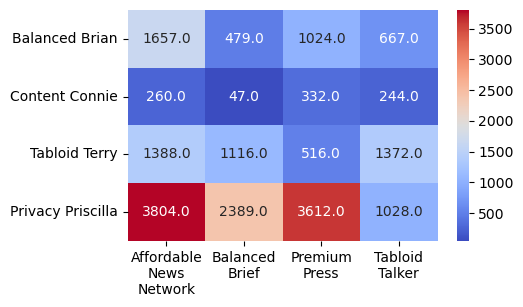

In [91]:
pivot_mean_diff = actual_contracts_df.pivot_table(index='u_persona', columns='s_persona', values='diff',aggfunc='mean')

pivot_mean_diff.reset_index(inplace=True)

# Set the size of the plot
plt.figure(figsize=(5, 3))

# Create the heatmap plot
heatmap = sns.heatmap(pivot_mean_diff.set_index('u_persona'), cmap='coolwarm', annot=True, fmt=".1f")
heatmap.set_xticklabels(['Affordable\nNews\nNetwork','Balanced\nBrief', 'Premium\nPress', 'Tabloid\nTalker'], rotation=0)

# Set the title and labels
#plt.title('2C Scores by User and Site Persona')
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.show()

In [98]:
# Improvements for persona_fit TRUE FALSE
diffs_3c_persona_fit = actual_contracts_df[['persona_fit','diff']].groupby(['persona_fit']).describe().reset_index()
diffs_3c_persona_fit


persona_fit  diff                                                            \
              count         mean          std    min     25%     50%      75%   
0       False  12.0  1162.333333  1018.248883   47.0  452.00  1026.0  1455.25   
1        True   4.0  1496.750000  1605.347600  332.0  442.25   925.5  1980.00   

           
      max  
0  3612.0  
1  3804.0

In [113]:
# Improvements for personas
diffs_by_s_persona = actual_contracts_df[['s_persona', 'diff']].groupby('s_persona').median().reset_index()
diffs_by_s_persona['persona_type'] = 'site'

# Calculate median of 'diff' grouped by 'u_persona'
diffs_by_u_persona = actual_contracts_df[['u_persona', 'diff']].groupby('u_persona').median().reset_index()
diffs_by_u_persona['persona_type'] = 'user'

# Rename columns for concat
diffs_by_s_persona.rename(columns={'s_persona': 'persona'}, inplace=True)
diffs_by_u_persona.rename(columns={'u_persona': 'persona'}, inplace=True)

# Concat
diffs_3c_persona_fit = pd.concat([diffs_by_s_persona, diffs_by_u_persona], axis=0).reset_index(drop=True)

diffs_3c_persona_fit.sort_values(by='diff')


,persona,diff,persona_type
5,Content Connie,252.0,user
2,Premium Press,770.0,site
1,Balanced Brief,797.5,site
4,Balanced Brian,845.5,user
3,Tabloid Talker,847.5,site
6,Tabloid Terry,1244.0,user
0,Affordable News Network,1522.5,site
7,Privacy Priscilla,3000.5,user


# Granularization of Consent and Content Resolutions
Objective: 

- Does the granularization of consent and content resolutions lead to better deals?
- Does the granularization of consent and content resolutions lead to different outcomes regarding consent or content?

Input Parameters

- Score_CC

- Consent_CC

- Content_CC

## 2C

In [61]:
two_c_df[['score_34', 'score_64', 'score_67', 'consent_34','consent_64','consent_67','content_34','content_64','content_67',]]

,score_34,score_64,score_67,consent_34,consent_64,consent_67,content_34,content_64,content_67
0,3480,3480,3480,33.33,33.33,33.33,70,70,70
1,7840,7840,7840,REJECTED,REJECTED,REJECTED,70,70,70
2,4950,4950,4950,33.33,16.67,16.67,70,70,70
3,7520,7520,7520,ALL,ALL,ALL,80,80,80
4,7392,7396,7396,33.33,50.0,50.0,70,70,70
5,7200,7200,7200,ALL,ALL,ALL,70,70,70
6,4730,4730,4730,66.67,83.33,83.33,80,80,80
7,7600,7600,7600,REJECTED,REJECTED,REJECTED,70,70,70
8,5250,5250,5250,33.33,16.67,16.67,70,70,70


Observations

- Score is same in one row (Exception: row 4)
- Content is same in one row
- Consent Rejected/Accepted is same in one row
- Tradeoffs in consent can result in different tradeoffs for more consent options (e.g. row 4: 33.33 => 50.0 and row 0: 33.33 => 33.33)

Interpretation

- Granularization (more resolutions) does not lead to better contract scores
- The number of consent resolutions can change the consent tradeoff

In [62]:
consent_diffs_df = two_c_df[~two_c_df['consent_34'].isin(['ALL', 'REJECTED'])][['user', 'site', 'consent_34', 'consent_64']]
consent_diffs_df['diff']= consent_diffs_df['consent_34'] - consent_diffs_df['consent_64']

consent_34_stats = consent_diffs_df['consent_34'].astype(int).describe()

# Calculate descriptive statistics for 'consent_64' column
consent_64_stats = consent_diffs_df['consent_64'].astype(int).describe()

# Concatenate the two Series into a DataFrame
combined_stats_df = pd.concat([consent_34_stats, consent_64_stats], axis=1).drop(['std','count'])

# Transpose the DataFrame
combined_stats_df = combined_stats_df.T

combined_stats_df

,mean,min,25%,50%,75%,max
consent_34,39.6,33.0,33.0,33.0,33.0,66.0
consent_64,39.6,16.0,16.0,33.0,50.0,83.0


Observations

- Median and Mean Consent remain same
- More consent options enable less and more consent 

## 3C

In [63]:
reduced = three_c_df[['score_535', 'score_565', 'consent_565','consent_535','content_535','content_565','cost_535','cost_565']]
reduced

,score_535,score_565,consent_565,consent_535,content_535,content_565,cost_535,cost_565
0,5600,5600,ALL,ALL,80,80,1,1
1,7200,7200,ALL,ALL,80,80,1,1
2,7216,7224,66.67,66.67,80,80,1,1
3,6640,6640,ALL,ALL,80,80,1,1
4,6400,6400,REJECTED,REJECTED,80,80,20,20
5,4224,4224,50.0,66.67,80,80,1,1
6,7000,7000,REJECTED,REJECTED,80,80,1,1
7,5418,5418,REJECTED,REJECTED,80,80,12,12
8,6400,6400,50.0,REJECTED,80,80,12,12
9,7200,7200,ALL,ALL,80,80,1,1


Observations

- Scores: Mostly same, some exceptions in row 2 and 15
- Consent Mostly Same, some exceptions in row 5 and 8
- Content always same
- Cost always same

Interpretation

- Granularization (more resolutions) does not lead to better contract scores
- The number of consent resolutions can **slightly** change the consent tradeoff

# Characteristics of Contracts
Objective: 

- Overview on distribution of scores
- Overview on agreed consent or **Privacy Friendliness**
- Overview on agreed content
- Overview on agreed cost
- Relation between issues (cost, consent, content)


## Scores
Objectives:

- Overview on Distribution of Scores
- Which scores are achieved by which Personas?
- Do personas, that logically fit, achieve higher scores?

Input:

- `score_CC` and `score_CCC`
- `u_persona` and `s_persona`
- `persona_fit`

In [64]:
score_34_stats = two_c_df['score_34'].describe().astype(int).to_frame().drop(['count', 'mean', 'std'])

# Calculate descriptive statistics for 'score_535' column
score_535_stats = three_c_df['score_535'].describe().astype(int).to_frame().drop(['count', 'mean', 'std'])

# Concatenate the two DataFrames horizontally
combined_stats_df = pd.concat([score_34_stats, score_535_stats], axis=1)

# Output the result
combined_stats_df

,score_34,score_535
min,3480,4224
25%,4950,5618
50%,7200,6520
75%,7520,7050
max,7840,7216


Observations:

- minimum lower in 3C
- median higher in 2C
- max higher in 2C

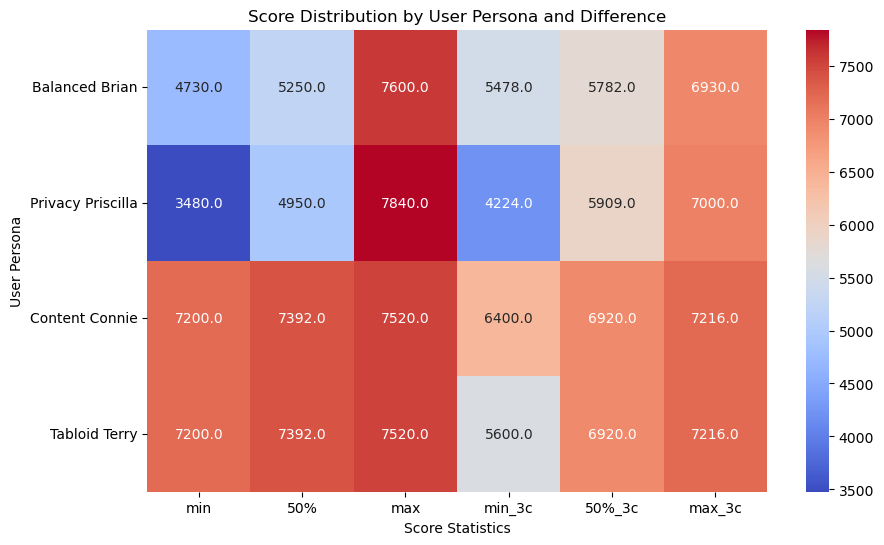

In [65]:
# Group by 'u_persona' and calculate summary statistics for 'score_34'
grouped_2c_scores = two_c_df.groupby('u_persona')['score_34'].describe().drop(['count', 'mean', 'std', '25%', '75%'], axis=1)

# Split 'Content Connie & Tabloid Terry' into two separate rows
content_connie_stats = grouped_2c_scores.loc['Content Connie & Tabloid Terry'].copy()
content_connie_stats.name = 'Content Connie'
tabloid_terry_stats = grouped_2c_scores.loc['Content Connie & Tabloid Terry'].copy()
tabloid_terry_stats.name = 'Tabloid Terry'

# Concatenate the original DataFrame with the split rows and drop the old row
grouped_2c_scores = pd.concat([grouped_2c_scores.drop('Content Connie & Tabloid Terry'), content_connie_stats.to_frame().T, tabloid_terry_stats.to_frame().T])


grouped_3c_scores = three_c_df.groupby('u_persona')['score_535'].describe().drop(['count','mean', 'std', '25%', '75%'], axis=1)
new_column_names = {
    'min': 'min_3c',
    '50%': '50%_3c',
    'max': 'max_3c',
    # Add more mappings as needed
}

# Rename columns of the DataFrame
grouped_3c_scores = grouped_3c_scores.rename(columns=new_column_names)

# Output the result
grouped_3c_scores

combined_df = pd.concat([grouped_2c_scores, grouped_3c_scores], axis=1)

plt.figure(figsize=(10, 6))

# Create the heatmap plot
heatmap = sns.heatmap(combined_df, cmap='coolwarm', annot=True, fmt=".1f")
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
# Set the title and labels
plt.title('Score Distribution by User Persona and Difference')
plt.xlabel('Score Statistics')
plt.ylabel('User Persona')

# Rotate the x-axis labels by 0 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0)

# Show the plot
plt.show()

WARNING: the scores of 2c vs 3c contracts are not comparable in the sense of 'now let's add cost to the negotiation and compare the contract afterwards'. However patterns can be observed.

Observations

- 2C:
  - Content Connie & Tabloid Terry have highest average score
  - Privacy Priscilla has the lowest minimum scores
  - Both Balanced Briand and Privacy Priscilla have higher maximum scores than Content Connie & Tabloid Terry
- 3C:
  - Content Connie has highest average score
  - Privacy Priscilla has the lowest minimum scores
  - Tabloid Terry's minimum score is now less than Content Connie's

Interpretation

- If a user mostly cares about content, he'll be the most satisfied with any site persona
- Users that somehow care about consent (or cost)

In [66]:
print(two_c_df.groupby('s_persona')['score_34'].describe().drop(['count','mean', 'std', '25%', '75%'], axis=1))

                                   min     50%     max
s_persona                                             
Affordable News Network         7392.0  7600.0  7840.0
Balanced Brief                  4950.0  5250.0  7200.0
Tabloid Talker & Premium Press  3480.0  4730.0  7520.0


Observations

- Affordable News Network has the highes total and average scores
- Tabloid Talker & Premium Press have the lowest minimum and median scores

Interpretation

- Sites that really worry about consent will not reach satisfying contracts with 50% of user personas

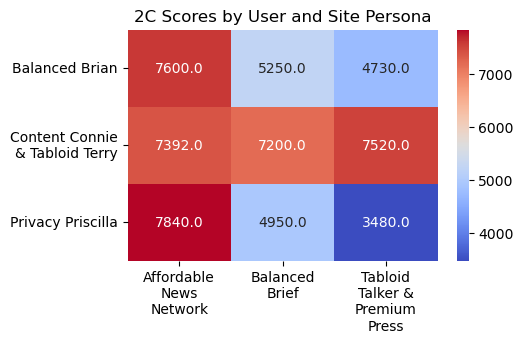

In [67]:
pivot_personas_scores = two_c_df.pivot_table(index='u_persona', columns='s_persona', values='score_34')

pivot_personas_scores.reset_index(inplace=True)

# Set the size of the plot
plt.figure(figsize=(5, 3))

# Create the heatmap plot
heatmap = sns.heatmap(pivot_personas_scores.set_index('u_persona'), cmap='coolwarm', annot=True, fmt=".1f")
heatmap.set_yticklabels(['Balanced Brian','Content Connie\n& Tabloid Terry','Privacy Priscilla'], rotation=0)
heatmap.set_xticklabels(['Affordable\nNews\nNetwork','Balanced\nBrief','Tabloid\nTalker &\nPremium\nPress'], rotation=0)

# Set the title and labels
plt.title('2C Scores by User and Site Persona')
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.show()

In [68]:
three_c_df['u_persona'].value_counts()


Tabloid Terry        4
Privacy Priscilla    4
Content Connie       4
Balanced Brian       4
Name: u_persona, dtype: int64

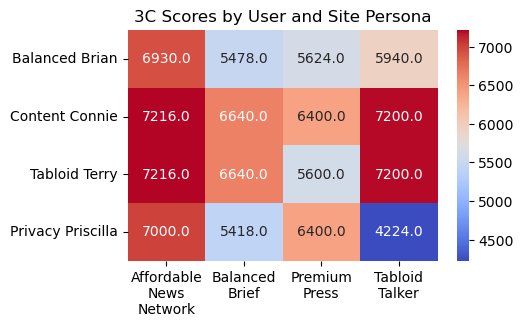

In [69]:
three_c_df['u_persona'] = pd.Categorical(three_c_df['u_persona'], categories=['Balanced Brian', 'Content Connie', 'Tabloid Terry', 'Privacy Priscilla'], ordered=True)

pivot_personas_scores_3c = three_c_df.pivot_table(index='u_persona', columns='s_persona', values='score_535')

pivot_personas_scores_3c.reset_index(inplace=True)
# Set the size of the plot
plt.figure(figsize=(5, 3))

# Create the heatmap plot
heatmap = sns.heatmap(pivot_personas_scores_3c.set_index('u_persona'), cmap='coolwarm', annot=True, fmt=".1f")
heatmap.set_xticklabels(['Affordable\nNews\nNetwork','Balanced\nBrief','Premium\nPress','Tabloid\nTalker'], rotation=0)

# Set the title and labels
plt.title('3C Scores by User and Site Persona')
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.show()

Observations

- Affordable News Network, Content Connie & Tabloid Terry reach the best contracts
- Balanced Brief and Tabloid Talker & Premium Press achieve the most satisfying results if their counterpart doesn't care about consent

In [70]:
# Descriptive stats for score_64 with persona_fit true and false
persona_fit_true_stats_64 = two_c_df[two_c_df['persona_fit'] == True]['score_64'].describe().drop(['count', 'mean', 'std'])
persona_fit_false_stats_64 = two_c_df[two_c_df['persona_fit'] == False]['score_64'].describe().drop(['count', 'mean', 'std'])

# Descriptive stats for score_565 with persona_fit true and false
persona_fit_true_stats_565 = three_c_df[three_c_df['persona_fit'] == True]['score_565'].describe().drop(['count', 'mean', 'std'])
persona_fit_false_stats_565 = three_c_df[three_c_df['persona_fit'] == False]['score_565'].describe().drop(['count', 'mean', 'std'])

# Merge horizontally
merged_persona_fit_scores = pd.concat([persona_fit_true_stats_64, persona_fit_false_stats_64, persona_fit_true_stats_565, persona_fit_false_stats_565], axis=1)
merged_persona_fit_scores.columns = ['persona_fit_True_64', 'persona_fit_False_64','persona_fit_True_565', 'persona_fit_False_565']

merged_persona_fit_scores

,persona_fit_True_64,persona_fit_False_64,persona_fit_True_565,persona_fit_False_565
min,5250.0,3480.0,5548.0,4224.0
25%,6385.0,4785.0,6187.0,5618.0
50%,7520.0,6075.0,6700.0,6520.0
75%,7680.0,7347.0,7050.0,6997.5
max,7840.0,7600.0,7200.0,7224.0


Observations

- 2C:
  - If personas fit, then min to max are higher
- 3C
  - If personas DONT fit, the top 50% of contracts are better
  - however, minimum and 25% quantile are worse
- 2C max scores are higher than 3C max scores

## Consent
Objective:

- Overview on granted consent (from totally rejected to fully accepted)
- Granted consent between user and site personas 
- Granted consent between logically fitting personas (e.g. Tabloid Terry and Tabloid Talker)

Input:

- 2C: `consent_34`, `consent_64`, `consent_67`
- 3C: `consent_535`, `consent_565`
- Personas: `u_persona` (user) and `s_persona` (site)
- Logical Perona fit: `persona_fit`


In [71]:
# 3c DF
consent_counts_2c_df = pd.concat([two_c_df['consent_34'], two_c_df['consent_64'], two_c_df['consent_67']]).value_counts().to_frame()
consent_counts_2c_df = consent_counts_2c_df.reset_index()
consent_counts_2c_df.columns = ['Consent', 'Count']
consent_counts_2c_df['Consent'] = pd.Categorical(consent_counts_2c_df['Consent'], categories=['REJECTED', 16.67, 33.33, 50.0, 66.67, 83.33, 'ALL'], ordered=True)
consent_counts_2c_df = consent_counts_2c_df.sort_values(by='Consent')
consent_counts_2c_df

# 3c DF
consent_counts_df = pd.concat([three_c_df['consent_535'], three_c_df['consent_565']]).value_counts().to_frame()
consent_counts_df = consent_counts_df.reset_index()
consent_counts_df.columns = ['Consent', 'Count']
consent_counts_df['Consent'] = pd.Categorical(consent_counts_df['Consent'], categories=['REJECTED', 33.33, 50.0, 66.67, 'ALL'], ordered=True)
consent_counts_df = consent_counts_df.sort_values(by='Consent')
consent_counts_df
consent_counts_df

# Merge
merged_consent_counts_df = consent_counts_2c_df.merge(consent_counts_df, how='outer', on='Consent', suffixes=('_2c', '_3c'))

# Make comparable
total = merged_consent_counts_df['Count_2c'].sum()
merged_consent_counts_df['Count_2c'] = round((merged_consent_counts_df['Count_2c']/total)*100,2)

total = merged_consent_counts_df['Count_3c'].sum()
merged_consent_counts_df['Count_3c'] = round((merged_consent_counts_df['Count_3c']/total)*100,2)

# Output the result
merged_consent_counts_df


,Consent,Count_2c,Count_3c
0,REJECTED,22.22,34.38
1,16.67,14.81,NaN
2,33.33,22.22,3.12
3,50.0,7.41,6.25
4,66.67,3.70,18.75
5,83.33,7.41,NaN
6,ALL,22.22,37.50


Observations

- ACCEPTED and REJECTED are more common in 3C
- ACCEPTED and REJECTED are equally common in 2C
- 2C has a tendency towards lower quantiles
- 3C has a tendency towards higher quantiles

Interpretation

- Granular contracts are less privacy preserving in 3C
- Contracts have more granular consent agreements in 2c
- ACCEPTED and REJECTED are equally common

In [72]:
# Relate user personas to site personas
pivot_personas_consent = two_c_df.pivot(index='u_persona', columns='s_persona', values='consent_64')

pivot_personas_consent.reset_index(inplace=True)

#print(pivot_personas_consent.to_string(index=False))
# Function to apply style to specific cells
def highlight_cell(x):
    color = 'background-color: yellow'
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    cells = [(0,2), (1,3), (2,1)]
    for c in cells:
        df_styler.iloc[c] = color
    
    return df_styler

pivot_personas_consent = pivot_personas_consent.style.apply(highlight_cell, axis=None).format(lambda x: "{:.2f}".format(x) if not isinstance(x, str) else x)

pivot_personas_consent

s_persona,u_persona,Affordable News Network,Balanced Brief,Tabloid Talker & Premium Press
0,Balanced Brian,REJECTED,16.67,83.33
1,Content Connie & Tabloid Terry,50.00,ALL,ALL
2,Privacy Priscilla,REJECTED,16.67,33.33


Observations:

- the higher a user prioritizes consent, the less consent agreed on
- vice versa for site

In [73]:
# Relate user personas to site personas
pivot_personas_consent = three_c_df.pivot(index='u_persona', columns='s_persona', values='consent_565')

pivot_personas_consent.reset_index(inplace=True)

# Function to apply style to specific cells
def highlight_cell(x):
    color = 'background-color: yellow'
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    cells = [(0,2), (1,3), (2,4), (3,1)]
    for c in cells:
        df_styler.iloc[c] = color
    
    return df_styler


# Apply style to the pivot table DataFrame
pivot_personas_consent = pivot_personas_consent.style.apply(highlight_cell, axis=None).format(lambda x: "{:.2f}".format(x) if not isinstance(x, str) else x)
            
#print(pivot_personas_consent.to_string(index=False)
pivot_personas_consent

s_persona,u_persona,Affordable News Network,Balanced Brief,Premium Press,Tabloid Talker
0,Balanced Brian,REJECTED,66.67,REJECTED,ALL
1,Content Connie,66.67,ALL,50.00,ALL
2,Tabloid Terry,66.67,ALL,ALL,ALL
3,Privacy Priscilla,REJECTED,REJECTED,REJECTED,50.00


## Content
Objective:

- Overview on agreed content
- Granted content between user and site personas 
- Granted content between logically fitting personas (e.g. Tabloid Terry and Tabloid Talker)

Input:

- 2C: `content_34`, `content_64`, `content_67`
- 3C: `content_535`, `content_565`
- Personas: `u_persona` (user) and `s_persona` (site)
- Logical Perona fit: `persona_fit`

In [74]:
content_counts_df = pd.concat([two_c_df['content_34'], two_c_df['content_64'], two_c_df['content_67']]).value_counts().to_frame()
content_counts_df = content_counts_df.reset_index()
content_counts_df.columns = ['Content', 'Count_2C']

content_counts_3c_df = pd.concat([three_c_df['content_535'], three_c_df['content_565']]).value_counts().to_frame()
content_counts_3c_df = content_counts_3c_df.reset_index()
content_counts_3c_df.columns = ['Content', 'Count_3C']

content_counts_df = pd.merge(content_counts_df, content_counts_3c_df, on='Content', how='outer')
content_counts_df

,Content,Count_2C,Count_3C
0,70,21,NaN
1,80,6,32.0


Observations:

- 2C: mostly 70%
- 3C: 
  - **even Content Connie gets 80% max.**
  - **even if 20 Eur were paid, maximum 80% of content would be granted**

In [75]:
pivot_personas_content = two_c_df.pivot(index='u_persona', columns='s_persona', values='content_64')

pivot_personas_content.reset_index(inplace=True)

#print(pivot_personas_consent.to_string(index=False))

pivot_personas_content

s_persona,u_persona,Affordable News Network,Balanced Brief,Tabloid Talker & Premium Press
0,Balanced Brian,70,70,80
1,Content Connie & Tabloid Terry,70,70,80
2,Privacy Priscilla,70,70,70


Observations

- minimum 70% of content
- 80% reached, if user value content more than their counterpart

## Cost in 3C
Objective:

- Overview on agreed cost
- Granted cost between user and site personas 
- Granted cost between logically fitting personas (e.g. Tabloid Terry and Tabloid Talker)

Input:

- 3C: `cost_535`, `cost_565`
- Personas: `u_persona` (user) and `s_persona` (site)
- Logical Perona fit: `persona_fit`

In [76]:
cost_counts_df = pd.concat([three_c_df['cost_535'], three_c_df['cost_565']]).value_counts(normalize=True).to_frame()
cost_counts_df = cost_counts_df.reset_index()
cost_counts_df.columns = ['Cost', 'Count_%']

cost_counts_df['Count_%'] = (cost_counts_df['Count_%'] * 100).map("{:.2f}".format)

cost_counts_df

,Cost,Count_%
0,1,75.00
1,12,18.75
2,20,6.25


Observations:

- Cost of 1 in 75% of cases
- Cost of 20 happens in rare cases
- MISSING: 0 and 6


In [77]:
pivot_personas_cost = three_c_df.pivot(index='u_persona', columns='s_persona', values='cost_565')

pivot_personas_cost.reset_index(inplace=True)

#print(pivot_personas_cost.to_string(index=False))

pivot_personas_cost

s_persona,u_persona,Affordable News Network,Balanced Brief,Premium Press,Tabloid Talker
0,Balanced Brian,1,1,12,1
1,Content Connie,1,1,12,1
2,Tabloid Terry,1,1,1,1
3,Privacy Priscilla,1,12,20,1


In [78]:
three_c_df.groupby([ 'cost_565','consent_565',]).size().reset_index(name='count').sort_values(by='cost_565')

,cost_565,consent_565,count
0,1,50.0,1
1,1,66.67,3
2,1,ALL,6
3,1,REJECTED,2
4,12,50.0,1
5,12,REJECTED,2
6,20,REJECTED,1


Observations

- Same cost different consent
- 1 Eur: probably high consent (100% or 66%)
- REJECTED possible for 1 and 20 Eur

In [79]:
three_c_df.groupby([ 'cost_565','content_565',]).size().reset_index(name='count').sort_values(by='cost_565')

,cost_565,content_565,count
0,1,80,12
1,12,80,3
2,20,80,1


Observations

- Content always 80%
- Even for 20Eur only 80%